In [1]:
import pandas as pd
# from matplotlib import plot as plt
import datetime,calendar

# Read and Clean Data 

In [2]:
def clean_data():
#     df = pd.read_csv('NSEI.csv')
    df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1190073600&period2=1656806400&interval=1d&events=history&includeAdjustedClose=true')
    df.dropna(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df['day'] = df['Date'].dt.dayofweek
    return df

# Get monthly sip_date dates (last thursday)

In [3]:
def addSIPDates(df):
    df['sip_date'] = False
    for idx,row in df.iterrows():
        year = row['Date'].year
        month = row['Date'].month
        day = row['Date'].day
        last_thursday = max(week[-4] for week in calendar.monthcalendar(year,month))
        if day==last_thursday:
            df.at[idx,'sip_date'] = True
    return df

In [4]:
def get_df_sip(df):
    df_sip = df[df['sip_date']==True].copy()
    df_sip.reset_index(inplace=True)
    df_sip.drop('index',axis=1,inplace=True)
    df_sip.plot(x='Date',y='Close')
    return df_sip

In [5]:
def calculate_wealth(df_sip,sip_val,step_perc_yearly):
    df_sip['sip_val'] = sip_val
    df_sip['cumulative'] = 0
    df_sip.at[0,'cumulative']=sip_val
    prev_year = df_sip.loc[0]['Date'].year
    for idx,row in df_sip[1:].iterrows():
    #     print("---------------------------")
    #     print('Date',row['Date'])
        year = row['Date'].year
        if year != prev_year:
            sip_val = sip_val*(1+step_perc_yearly/100)
            prev_year = year
        df_sip.at[idx,'sip_val'] = sip_val
        prev_cumul = df_sip.loc[idx-1]['cumulative']
    #     print("prev cumulative",prev_cumul)
        prev_close = df_sip.loc[idx-1]['Close']
    #     print("prev close",prev_close)
        curr_close = df_sip.loc[idx]['Close']
    #     print("current close",curr_close)
        gain_perc = (curr_close-prev_close)/100
    #     print("gain %",gain_perc)
        multi_factor = 1+(gain_perc/100)
    #     print("multiplying factor",multi_factor)
        curr_cumul = prev_cumul*multi_factor + sip_val
    #     print(curr_cumul)
        df_sip.at[idx,'cumulative'] = curr_cumul
    return df_sip

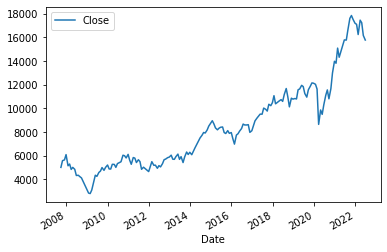

In [6]:
sip_val = 100000
step_perc_yearly = 20

df = clean_data()
df = addSIPDates(df)
df_sip = get_df_sip(df)
df_sip = calculate_wealth(df_sip,sip_val,step_perc_yearly)

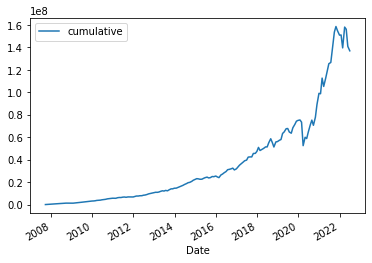

In [7]:
df_sip.plot(x='Date',y='cumulative')